# Importing Libraries 


In [37]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Import Database


In [38]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object, 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

# One-Hot Encoding

In [40]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Splitting the dataset

In [41]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [42]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [43]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [44]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [46]:
X_train, y_train

(      age     bmi  ...  region_southeast  region_southwest
 560    46  19.950  ...                 0                 0
 1285   47  24.320  ...                 0                 0
 1142   52  24.860  ...                 1                 0
 969    39  34.320  ...                 1                 0
 486    54  21.470  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 1095   18  31.350  ...                 0                 0
 1130   39  23.870  ...                 1                 0
 1294   58  25.175  ...                 0                 0
 860    37  47.600  ...                 0                 1
 1126   55  29.900  ...                 0                 1
 
 [1070 rows x 11 columns], 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Lengt

In [47]:
X_test, y_test

(      age     bmi  ...  region_southeast  region_southwest
 764    45  25.175  ...                 0                 0
 887    36  30.020  ...                 0                 0
 890    64  26.885  ...                 0                 0
 1293   46  25.745  ...                 0                 0
 259    19  31.920  ...                 0                 0
 ...   ...     ...  ...               ...               ...
 109    63  35.090  ...                 1                 0
 575    58  27.170  ...                 0                 0
 535    38  28.025  ...                 0                 0
 543    54  47.410  ...                 1                 0
 846    51  34.200  ...                 0                 1
 
 [268 rows x 11 columns], 764      9095.06825
 887      5272.17580
 890     29330.98315
 1293     9301.89355
 259     33750.29180
            ...     
 109     47055.53210
 575     12222.89830
 535      6067.12675
 543     63770.42801
 846      9872.70100
 Name: charges, Length

# Model Creation

In [48]:
import numpy as np

In [49]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])


insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [50]:
insurance_model.evaluate(X_test, y_test)  

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [51]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

# Improving the model evaluation

## Adding extra layer and Adam Optimizer

In [54]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])


insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [55]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

# Training for longer period

In [58]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])


insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [59]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

# Plotting Evaluation 

Text(0, 0.5, 'loss')

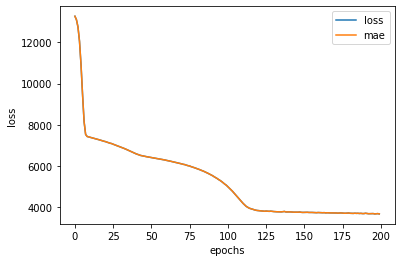

In [60]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")